In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import the ready dataset from sklearn dataset library 
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis, pointbiserialr
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc
import random

In [2]:
#download the data in object "data"
data = load_breast_cancer()
#convert it to data frame to facilitate handling
df= pd.DataFrame(data.data, columns=data.feature_names)

#add target column in df that includes (malignant=0 , benign =1)
df['target'] = data.target
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [3]:
print(df['target'])

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


In [4]:
#num of rows and columns
print("Dataset shape:", df.shape)
#num of null values in every column
print("\nMissing values:\n", df.isnull().sum())

Dataset shape: (569, 31)

Missing values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [5]:
#print num of each case in target column (malignant = 0 , benign =1)
print("\nTarget class distribution:\n", df['target'].value_counts())
print("--------------")
#print their percentage
print(f"\nBenign: {df['target'].value_counts(normalize=True)[1]*100:.2f}%, Malignant: {df['target'].value_counts(normalize=True)[0]*100:.2f}%")


Target class distribution:
 target
1    357
0    212
Name: count, dtype: int64
--------------

Benign: 62.74%, Malignant: 37.26%


In [6]:
#print the descriptive statistics for every column like (mean ,std ,min value..)
print("\nDescriptive statistics:\n", df.describe())


Descriptive statistics:
        mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000        

C:\Users\Maram allah\AppData\Local\Temp\ipykernel_15528\308166054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm')


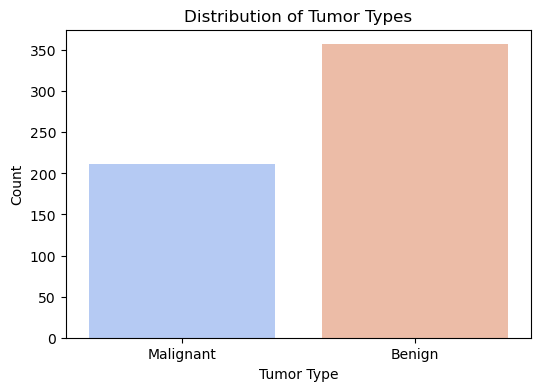

In [7]:
#visualize num of cases in every tumor type
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title("Distribution of Tumor Types")
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()

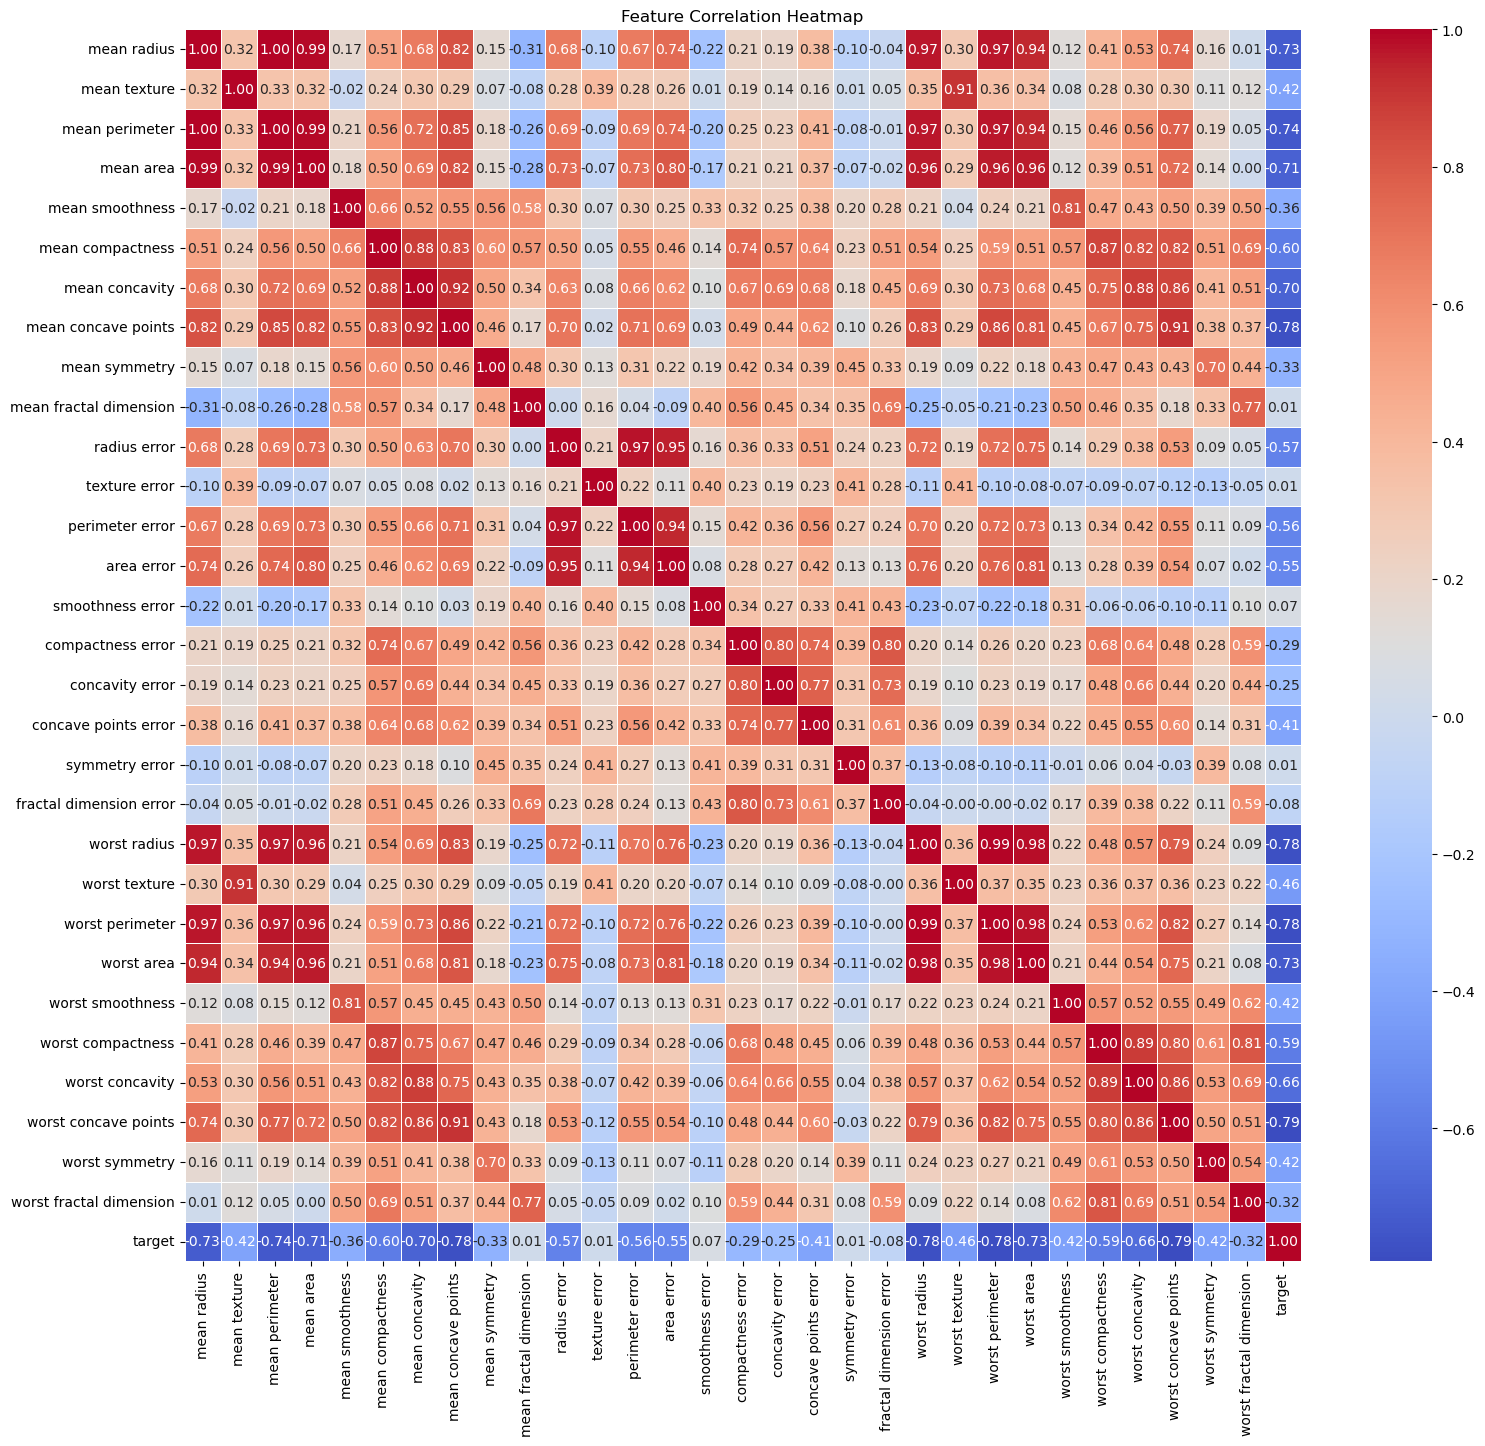

In [8]:
#visualize correlations between every 2 featuers
#correlation values between -1 and 1
plt.figure(figsize=(18, 16))
#calc correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
#correlation with Target
target_corrs = {col: pointbiserialr(df[col], df['target'])[0] for col in df.columns[:-1]}
corr_series = pd.Series(target_corrs).sort_values(key=abs, ascending=False)
print("\nTop Features Correlated with Target:\n", corr_series.head(10))


Top Features Correlated with Target:
 worst concave points   -0.793566
worst perimeter        -0.782914
mean concave points    -0.776614
worst radius           -0.776454
mean perimeter         -0.742636
worst area             -0.733825
mean radius            -0.730029
mean area              -0.708984
mean concavity         -0.696360
worst concavity        -0.659610
dtype: float64


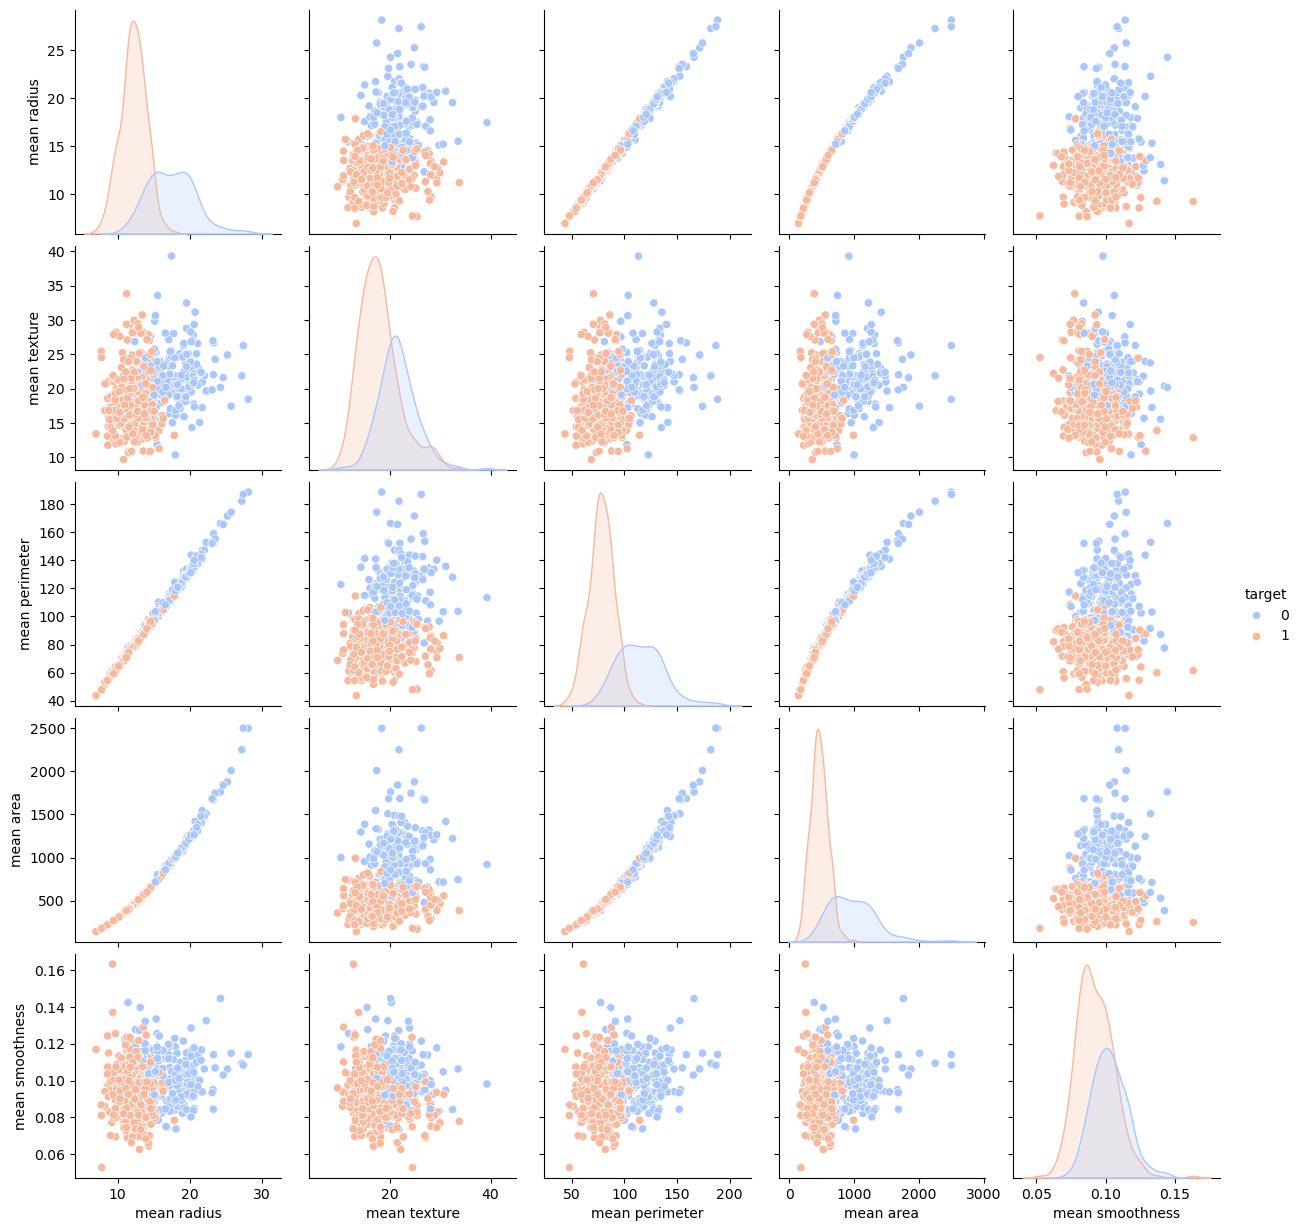

In [10]:
#visualize relations between selected features in pair plot
#pair plot func needs the hue to be in the same df of the features
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']
sns.pairplot(df[selected_features], hue='target', palette='coolwarm')
plt.show()

This shows the form of the relations between some selected features :

1- if the orange points and blue points is separated clearly that means this 2 features is good to classify the results

2- relation between the feature and itself representin in KDE CURVE to show distribute the feature for every class

(density of the values not the real values) , area under curve = 1

3- the malignant class has bigger mean (radius , area , perimeter) values than the benign

4- Smoothies: in Mean smoothies HISTOGRAM this is an overlapping that means bad classify feature , and have overlapping with any other feature

5- relation between radius and perimeter and area is dependant , linear ,good for classify but it's redundancy , the same between perimeter and area 

C:\Users\Maram allah\AppData\Local\Temp\ipykernel_15528\2097128857.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='coolwarm')
C:\Users\Maram allah\AppData\Local\Temp\ipykernel_15528\2097128857.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='coolwarm')
C:\Users\Maram allah\AppData\Local\Temp\ipykernel_15528\2097128857.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='coolwarm')
C:\Users\Maram allah\AppData\Local

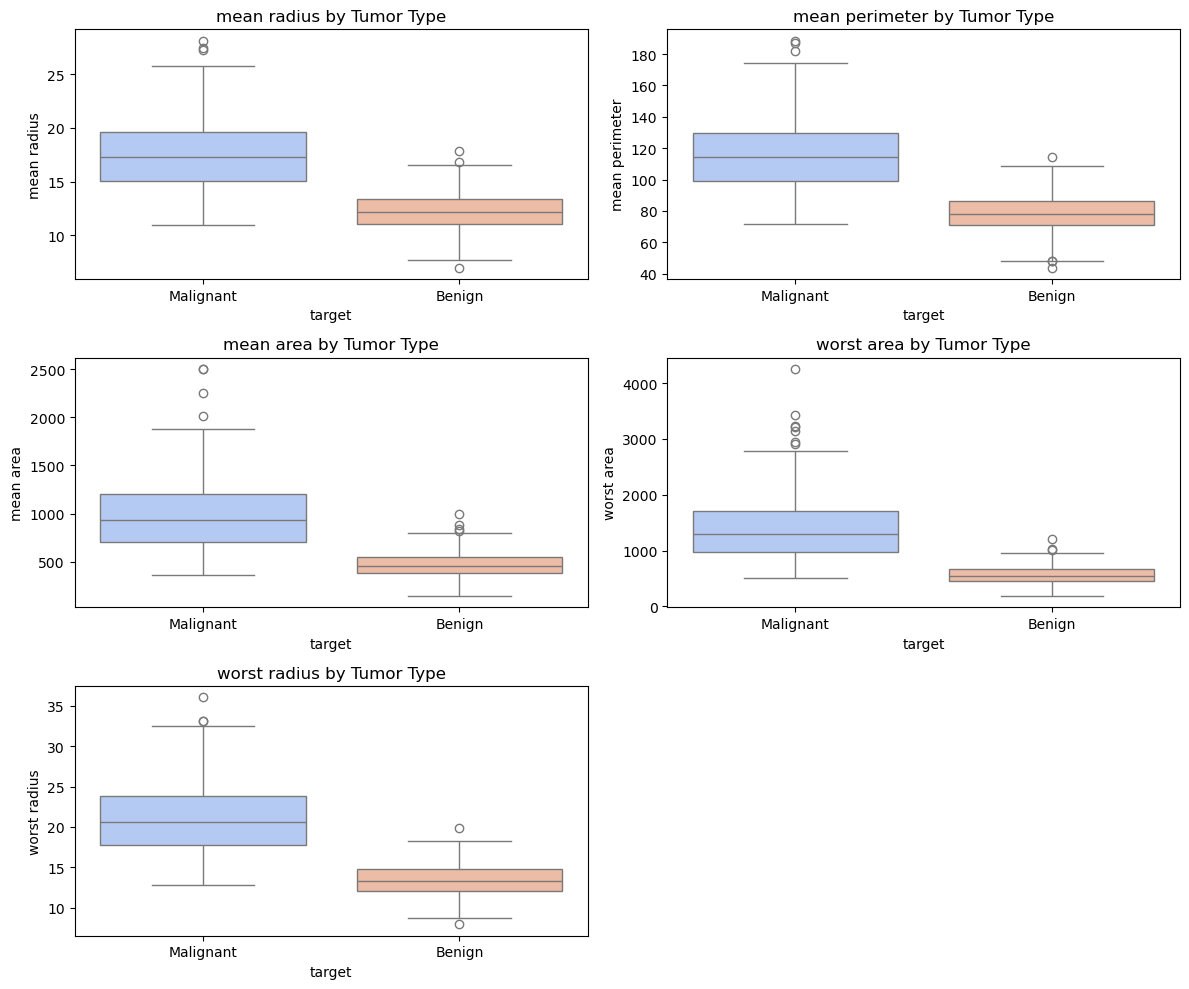

In [11]:
#Boxplots for Top Features
top_features = ['mean radius', 'mean perimeter', 'mean area', 'worst area', 'worst radius']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(top_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='target', y=feature, data=df, palette='coolwarm')
    plt.title(f'{feature} by Tumor Type')
    plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.tight_layout()
plt.show()

### PCA 

In [12]:
#PCA for 2D Visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

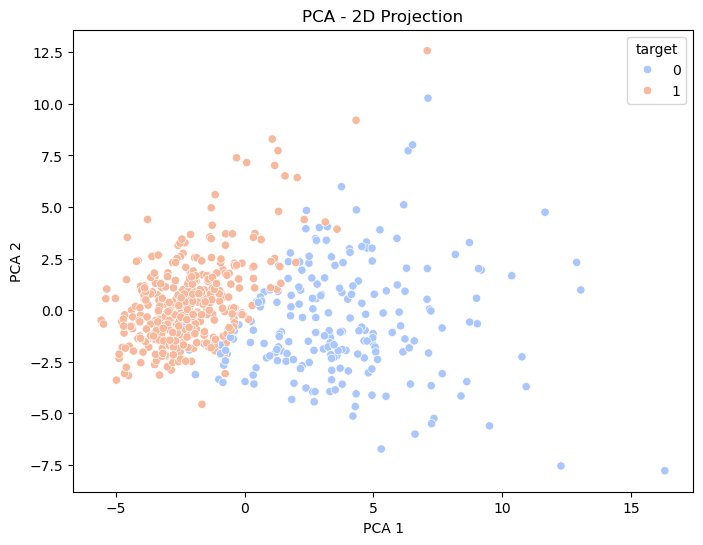

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['target'], palette='coolwarm')
plt.title("PCA - 2D Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [14]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['target'], test_size=0.3, random_state=42, stratify=df['target'])

Creating SVM model and evaluate it's performance using Cross validation :

the main target is to find the best hyperplane to separate 2 different classes

1- CV use the SVM model to measure accuracy of the model in every Fold

2- CV split data into k number of folds , the model training in all fold except 1 different fold for testing every k times

3- if there is difference between the scores in every fold that's a sign for overfitting

4- we used k= 5 cause 5 is suitable for data size and makes a good balance between accuracy and time

5- cv don't need pre-training step , cause it trains inside in every fold


In [15]:
#just creating the svm model
svm_model = SVC(kernel='rbf', random_state=42)
#rbf non linear type of kernel used to convert non-separable data into a separable space


#calc accuracy of the model in every fold
cv_scores = cross_val_score(svm_model, X_scaled, df['target'], cv=5) 
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")


Cross-validation scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean cross-validation score: 0.9736




###  Why use GridSearchCV?

Machine learning models like SVM have settings (called **hyperparameters**) that can affect how well the model performs. For example:
- `C` controls how much you want to avoid misclassifying each training example.
- `gamma` defines how far the influence of a single training example reaches.
- `kernel` is the function used to map data into a higher dimension.

**GridSearchCV** helps find the best combination of these settings by:
1. Trying all combinations from the parameter grid.
2. Training and validating the model multiple times (using cross-validation).
3. Selecting the best one based on performance (here we use `accuracy`).




In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], #C (Regularization Parameter)
    'gamma': [1, 0.1, 0.01, 0.001], #gamma (Kernel Coefficient)
    'kernel': ['rbf'] # Kernel type
    # 'linear', 'poly', 'sigmoid' can be added
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5, scoring='accuracy')

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test Accuracy of the best model: ", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best, target_names=data.target_names))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

In [17]:
# Train SVM with RBF kernel
best_params = grid_search.best_params_
svm_model = SVC(**best_params, probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]  



#predict results on test data
y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

#predict on training data to compare and checking for any overfitting
y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)


print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9849
Test Accuracy: 0.9708


In [18]:
# Predict on test set
y_pred_svm = svm_model.predict(X_test)


# Evaluate SVM
print("SVM Performance:")
print(classification_report(y_test, y_pred_svm, target_names=data.target_names))

SVM Performance:
              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        64
      benign       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



there is no overfitting cause train and test accuracy values is high and so close

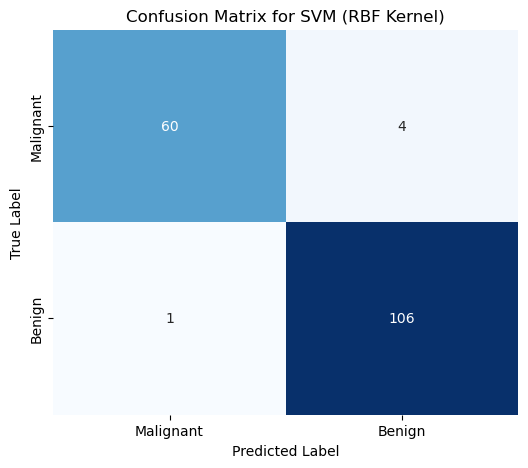

In [19]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title("Confusion Matrix for SVM (RBF Kernel)")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Classification Report Explained

This report summarizes the performance of a classification model on a **binary classification task** with classes `0` and `1`.

### Class-wise Metrics

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0** | 0.98      | 0.94   | 0.96     | 64      |
| **1** | 0.96      | 0.99   | 0.98     | 107     |

- **Class 0**:
  - 🔹 *Precision* = 0.98 → Out of all predicted class 0, 98% were actually class 0.
  - 🔹 *Recall* = 0.94 → Out of all actual class 0 samples, 94% were correctly identified.
  - 🔹 *F1-Score* = 0.96 → A balance between precision and recall.
- **Class 1**:
  - 🔹 *Precision* = 0.96 → Out of all predicted class 1, 96% were correct.
  - 🔹 *Recall* = 0.99 → The model caught 99% of all true class 1 samples.
  - 🔹 *F1-Score* = 0.98 → Excellent balance with high performance.

### Overall Metrics

- **Accuracy**: `0.97` → The model correctly predicted 97% of all test samples (171 total).
- **Macro Average**:  
  - Treats all classes equally.  
  - *Precision*: 0.97, *Recall*: 0.96, *F1-Score*: 0.97  
- **Weighted Average**:  
  - Takes into account the number of instances per class (support).  
  - *Precision*: 0.97, *Recall*: 0.97, *F1-Score*: 0.97  

### Summary

- The model performs **very well** on both classes, especially class 1.
- Slightly lower recall for class 0 suggests a few were missed, but overall performance is **balanced and strong**.



In [20]:
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        64
           1       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171




This code visualizes the learning behavior of an SVM classifier using an RBF kernel by plotting a **learning curve**. A learning curve helps diagnose if a model suffers from high bias (underfitting) or high variance (overfitting).

## Learning Curve Analysis

The **Learning Curve** helps us understand how the model's performance changes with varying amounts of training data. Below are the key observations:

### Key Observations

1. **Training Score (Blue Line)**:
   - Starts low but increases as more data is used.
   - Plateaus at around **98%** accuracy, indicating stable performance with additional data.

2. **Validation Score (Green Line)**:
   - Increases with more data and converges closely to the training score.
   - Shows good generalization to unseen data.

3. **Gap Between Training and Validation Scores**:
   - Small gap that does not widen with more data, indicating no overfitting.

4. **Convergence**:
   - Both curves converge at high accuracy levels (~98%), suggesting effective learning.

### Interpretation

- **No Overfitting**: The validation score closely follows the training score, indicating the model is not memorizing the training data.
- **No Underfitting**: High accuracy on both training and validation sets suggests the model is capable of capturing the underlying patterns.
- **Sufficient Data**: The learning curve shows that the model performs well even with limited data, and there is no significant improvement beyond a certain point, indicating adequate dataset size.

### Conclusion

The **Learning Curve** confirms that the SVM model with an RBF kernel is well-tuned and generalizes well to unseen data. There are no signs of overfitting or underfitting, and the dataset size appears sufficient for the task.



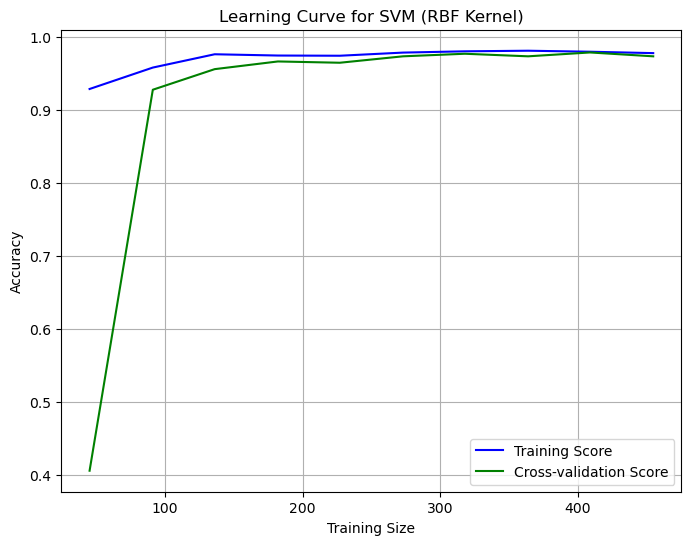


Final Accuracy of the SVM Model: 0.9708


In [21]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=svm_model,
    X=X_scaled, y=df['target'],
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', color='blue')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation Score', color='green')
plt.title("Learning Curve for SVM (RBF Kernel)")
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

final_acc = accuracy_score(y_test, y_test_pred)
print(f"\nFinal Accuracy of the SVM Model: {final_acc:.4f}")

### Neural Network Implementation

###  Neural Network Model Definition

In this cell, we define a simple feedforward neural network for binary classification using Keras. The model uses:

- **Input layer** based on the number of features in the training data.
- Two hidden layers with `Dense` units and the **ReLU activation function**, which helps the network learn non-linear patterns efficiently.
- An output layer with a **sigmoid activation** to output probabilities for binary classification.

We compile the model using the **Adam optimizer**, which combines momentum and adaptive learning rates for faster convergence and better performance in most tasks.

Key components:
- **ReLU (`relu`)**: Activation function that outputs the input if it's positive, otherwise zero. It helps avoid vanishing gradients and accelerates training.
- **Adam (`adam`)**: An adaptive optimizer that adjusts the learning rate for each parameter, improving convergence on noisy and sparse data.

We'll use this model later for training and evaluation.


In [22]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
def create_model(activation='relu'):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(10, activation=activation),
        Dense(8, activation=activation),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [23]:
nn_model = create_model()

This code trains a neural network model with early stopping to prevent overfitting. It uses the EarlyStopping callback to monitor the validation loss during training and stops early if the loss doesn't improve for 10 consecutive epochs (patience=10). The best model weights are restored once training ends. The model is trained for up to 100 epochs on 80% of the data, with 20% held out for validation, and processes data in batches of 8 samples at a time. Setting verbose=0 means no progress messages are printed during training

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = nn_model.fit(X_train, y_train, 
                       validation_split=0.2, 
                       epochs=100, 
                       batch_size=8, 
                       callbacks=[early_stop], 
                       verbose=0)

The model performs exceptionally well for both classes:
High precision (focuse on FP) and recall(focuse on FN) for malignant , indicating few false negatives and false positives.
Slightly higher precision for benign , showing it is very confident when predicting benign cases.
With an overall accuracy of 96% , and balanced performance across both classes, this model demonstrates strong generalization and reliability in distinguishing between malignant and benign cases

In [25]:
# Predict on test set
y_pred_nn = (nn_model.predict(X_test).flatten() > 0.5).astype(int)
y_proba_nn = nn_model.predict(X_test).flatten()  # Probabilities for AUC #Probabilities from sigmoid output

# Evaluate NN
print("\nNeural Network Performance:")
print(classification_report(y_test, y_pred_nn, target_names=data.target_names))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Neural Network Performance:
              precision    recall  f1-score   support

   malignant       0.94      0.97      0.95        64
      benign       0.98      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



The loss curve visualizes how the neural network's training and validation loss changed over epochs. The blue line represents the training loss, while the orange line shows the validation loss. Initially, both losses drop quickly, meaning the model learns fast from the data. After about 30–40 epochs, the losses start to level off, indicating the model has converged and is no longer learning significant new patterns. The small gap between the two curves suggests minimal overfitting, meaning the model generalizes well to unseen data. The use of early stopping likely prevented unnecessary training beyond this point, saving time and reducing the risk of overfitting. Overall, the model performs well with stable learning behavior and good generalization.

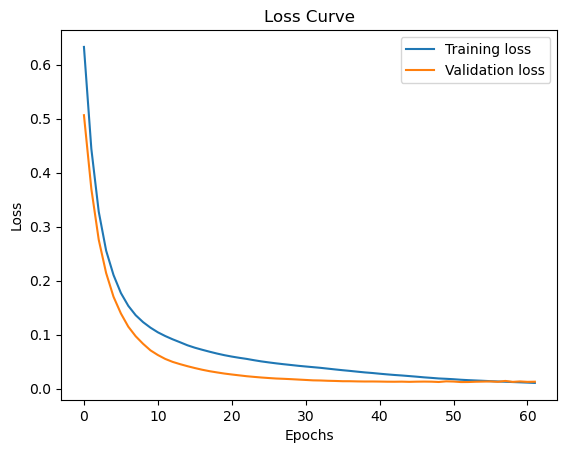

In [26]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()


In [27]:
# Evaluate accuracy
loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# Predict probabilities
y_pred_prob = nn_model.predict(X_test)

# Convert probabilities to class labels (0 or 1)
y_pred_labels = (y_pred_prob > 0.5).astype(int)

# True labels 
y_true_labels = y_test  

Test Accuracy: 0.9649
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


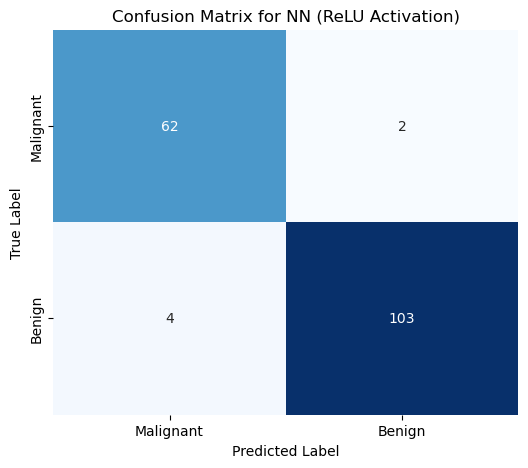

In [28]:
cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title("Confusion Matrix for NN (ReLU Activation)")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [29]:


print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=data.target_names))


Classification Report:
              precision    recall  f1-score   support

   malignant       0.94      0.97      0.95        64
      benign       0.98      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



The results indicate how each model performs in terms of loss and accuracy on both the training and validation datasets. The output also includes confusion matrices and classification reports for each activation function, allowing for a direct comparison of their effectiveness in binary classification. This experiment helps determine which activation function leads to better learning, generalization, and class separation

In [30]:
for act in ['relu', 'sigmoid', 'tanh']:
    print(f"\nUsing activation: {act}")
    model = create_model(activation=act)
    model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)
    _, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Accuracy: {acc:.4f}")



Using activation: relu
Accuracy: 0.9766

Using activation: sigmoid
Accuracy: 0.9532

Using activation: tanh
Accuracy: 0.9474


### Model Comparison and Analysis

-Both curves are close to the top-left corner of the plot, indicating high performance for both models
-The AUC is a measure of the overall performance of the model, with a value of 1 indicating a perfect model and a value of 0.5 indicating a model with performance no better than random guessing.
-The SVM model has an AUC of 0.99, which means it has perfect discrimination between the two classes.
-The Neural Network model has an AUC of 0.99, which is also very close to perfect and indicates excellent performance.
-the diagonal line in an ROC curve is significant because it represents the performance of a random classifier, serves as a baseline for comparison, and helps in visualizing the trade-offs between TPR and FPR for different decision thresholds. Models with ROC curves that are significantly above this line are considered to have good predictive performance.

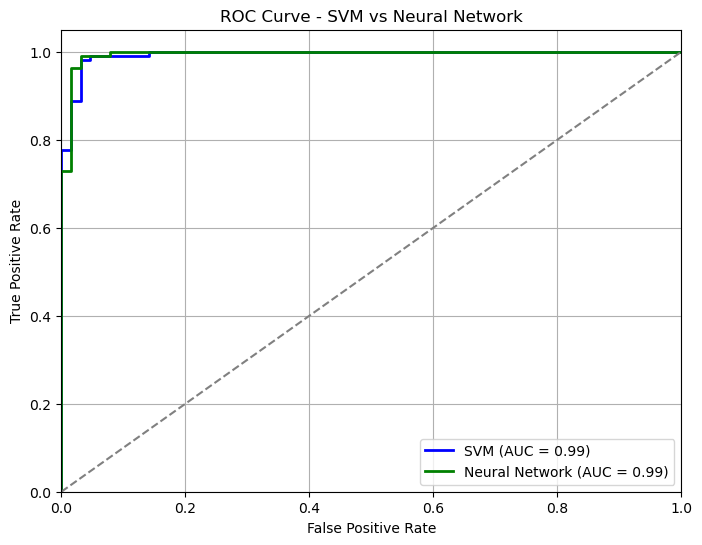

In [31]:
# Compute ROC curve and Area Under the Curve (AUC) for both models
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC Curves
plt.figure(figsize=(8,6))
plt.plot(fpr_svm, tpr_svm, color='blue',
         lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')

plt.plot(fpr_nn, tpr_nn, color='green',
         lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM vs Neural Network')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#  Model Comparison: SVM vs. Neural Network


We compare two models on a binary classification task (likely malignant vs. benign tumors) using metrics such as **accuracy**, **precision**, **recall**, and **F1-score**.

| Metric              | SVM             | Neural Network |
|---------------------|-----------------|----------------|
| **Test Accuracy**   | **0.9708**      | 0.9649         |
| **Precision (Class 0 - Malignant)** | 0.9836 | 0.9394 |
| **Recall (Class 0 - Malignant)**    | 0.9375 | 0.9688 |
| **Precision (Class 1 - Benign)**    | 0.9636 | 0.9810 |
| **Recall (Class 1 - Benign)**       | 0.9907 | 0.9626 |

---


### 1. **SVM Slightly Outperforms Neural Network**
- **Accuracy**: SVM achieves slightly higher accuracy (**97.08%**) compared to the neural network (**96.49%**).
- **Benign Class Recall**: SVM better identifies true benign cases (**99.07%** recall vs. **96.26%**).

### 2. **Neural Network Excels in Malignant Recall**
- The neural network shows **better recall for malignant cases (96.88%)** compared to SVM (93.75%), meaning it misses fewer malignant tumors — a crucial factor in medical diagnosis.

### 3. **Balanced Performance**
- Both models maintain good balance across precision and recall.
- No clear sign of **overfitting** (e.g., large gap between training/validation and test performance).
- Slight signs of **underfitting** in the neural network, as there's room to improve performance with:
  - Better architecture
  - Hyperparameter tuning
  - Regularization techniques

---

## 🛠️ Recommendations for Improvement

### For Neural Network:
- ✅ **Add Dropout or Batch Normalization** to improve generalization.
- ✅ **Tune hyperparameters** (learning rate, optimizer, layer sizes).
- ✅ **Try different activation functions** (e.g., LeakyReLU, ELU).
- ✅ **Increase model complexity** slightly if underfitting is observed.


---


Both models perform exceptionally well (>96% accuracy), making them suitable for deployment. However:

- If **missing malignant tumors is more critical**, prefer the **neural network** due to its **higher recall on class 0**.
- If **overall accuracy and benign detection matter most**, go with the **SVM**.

In [32]:
# Print metrics side by side
print("Model Comparison - Test Set Metrics:")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"NN Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")

print("\nClassification Reports:")
print("SVM:\n", classification_report(y_test, y_pred_svm, digits=4))
print("Neural Network:\n", classification_report(y_test, y_pred_nn, digits=4))

Model Comparison - Test Set Metrics:
SVM Accuracy: 0.9708
NN Accuracy: 0.9649

Classification Reports:
SVM:
               precision    recall  f1-score   support

           0     0.9836    0.9375    0.9600        64
           1     0.9636    0.9907    0.9770       107

    accuracy                         0.9708       171
   macro avg     0.9736    0.9641    0.9685       171
weighted avg     0.9711    0.9708    0.9706       171

Neural Network:
               precision    recall  f1-score   support

           0     0.9394    0.9688    0.9538        64
           1     0.9810    0.9626    0.9717       107

    accuracy                         0.9649       171
   macro avg     0.9602    0.9657    0.9628       171
weighted avg     0.9654    0.9649    0.9650       171

